# Data Description Notebook: Models 1 & 2

**Medicare DeSYNPuf Data: 
2009 Inpatient Claims for Risk Adjustment Modeling and Correspondence Analysis**

HDS 823 Final Project: Advanced Statistics in Healthcare
Kyle P. Rasku RN BSN

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# Load 2009 IP & ELIX Data, Created by the Cleaning Notebook
desynpuf = pd.read_csv("/home/kylier/python/DS/data/PUF/PUF_RWJF_ALLIP2009_NO.csv")

In [3]:
desynpuf.head()

,Unnamed: 0,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,FIPS_COUNTY_CODE,FULL_FIPS_CODE,CBSA,CBSA_NAME,FIPS_STATE_CODE,CLM_ID,...,B_DIED,PERCENT_COSTS,STATE,COUNTY,HO_RANK,HO_PROP_RANK,HO_QUARTILE,HF_RANK,HF_PROP_RANK,HF_QUARTILE
0,0,0000438E79D01BEA,1937-05-01,NaN,57,12057,45300,"Tampa-St. Petersburg-Clearwater, FL",12,NaN,...,0.0,0.000000,Florida,Hillsborough,27.0,0.597,2.0,31.0,0.537,2.0
1,1,00010E7BEA69142C,1938-04-01,2009-11-01,3,10003,48864,"Wilmington, DE-MD-NJ",10,NaN,...,1.0,0.000000,Delaware,New Castle,1.0,0.667,1.0,1.0,0.667,1.0
2,2,00015BF6509E1DF7,1934-05-01,NaN,119,37119,16740,"Charlotte-Gastonia-Concord, NC-SC",37,NaN,...,0.0,0.000000,North Carolina,Mecklenburg,5.0,0.950,1.0,14.0,0.860,1.0
3,3,000240D599ED789C,NaN,NaN,35,55035,20740,"Eau Claire, WI",55,6.925911e+14,...,0.0,0.004938,Wisconsin,Eau Claire,13.0,0.819,1.0,4.0,0.944,1.0
4,4,0003E73AFBA840A8,1941-09-01,NaN,55,36055,40380,"Rochester, NY",36,NaN,...,0.0,0.000000,New York,Monroe,31.0,0.500,2.0,17.0,0.726,2.0


In [4]:
desynpuf.drop(["Unnamed: 0"], axis=1, inplace=True)
desynpuf.isnull().sum() 

DESYNPUF_ID              0
BENE_BIRTH_DT        23839
BENE_DEATH_DT       117781
FIPS_COUNTY_CODE         0
FULL_FIPS_CODE           0
CBSA                     0
CBSA_NAME            27632
FIPS_STATE_CODE          0
CLM_ID               95669
CLM_DRG_CD           95669
BENE_AGE                 0
AGE_GROUP                0
B_SEX                    0
B_ALZHDMTA               0
B_CHF                    0
B_CNCR                   0
B_COPD                   0
B_DEPRESSN               0
B_DIABETES               0
B_ISCHMCHT               0
B_OSTEOPRS               0
B_CHRNKIDN               0
B_RA_OA                  0
B_STRKETIA               0
B_ESRD                   0
NH_WHITE                 0
AA_BLACK                 0
OTHER                    0
NW_HISPANIC              0
MEAN_ELIX_SCORE          0
CODES_COUNT              0
TOTCHRONIC               0
ALLCOSTS                 0
CVRG_MOS                 0
RX_CVRG_MOS              0
LENGTH_OF_STAY           0
PHYS_COUNT               0
B

In [5]:
desynpuf.shape

(119508, 47)

In [6]:
desynpuf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119508 entries, 0 to 119507
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DESYNPUF_ID       119508 non-null  object 
 1   BENE_BIRTH_DT     95669 non-null   object 
 2   BENE_DEATH_DT     1727 non-null    object 
 3   FIPS_COUNTY_CODE  119508 non-null  int64  
 4   FULL_FIPS_CODE    119508 non-null  int64  
 5   CBSA              119508 non-null  int64  
 6   CBSA_NAME         91876 non-null   object 
 7   FIPS_STATE_CODE   119508 non-null  int64  
 8   CLM_ID            23839 non-null   float64
 9   CLM_DRG_CD        23839 non-null   object 
 10  BENE_AGE          119508 non-null  float64
 11  AGE_GROUP         119508 non-null  object 
 12  B_SEX             119508 non-null  int64  
 13  B_ALZHDMTA        119508 non-null  int64  
 14  B_CHF             119508 non-null  int64  
 15  B_CNCR            119508 non-null  int64  
 16  B_COPD            11

## Demographic Distributions

Age, Age Group, Sex, Race & Ethnicity

In [7]:
demographics = desynpuf.groupby(["DESYNPUF_ID"]).aggregate({"BENE_AGE":"mean",
                                                            "B_SEX":"mean",
                                                            "NH_WHITE": "mean",
                                                            "AA_BLACK" : "mean",
                                                            "OTHER": "mean",
                                                            "NW_HISPANIC": "mean",
                                                            "B_DIED":"sum",
                                                            "CLM_ID":"count",
                                                            "ALLCOSTS":["mean", "sum"]})

demographics.columns = ["BENE_AGE", "B_SEX", "NH_WHITE", "AA_BLACK", "OTHER", "NW_HISPANIC", "B_DIED", 
                        "NUMBER_OF_STAYS", "MEAN_COST", "SUM_COST"]
demographics.loc[demographics["B_DIED"]>1, "B_DIED"] = 1
demographics.loc[((demographics["BENE_AGE"]>0) & (demographics["BENE_AGE"]<19)), "AGE_GROUP"] = "0-18"
demographics.loc[((demographics["BENE_AGE"]>18) & (demographics["BENE_AGE"]<45)), "AGE_GROUP"] = "19-44"
demographics.loc[((demographics["BENE_AGE"]>44) & (demographics["BENE_AGE"]<65)), "AGE_GROUP"] = "45-64"
demographics.loc[((demographics["BENE_AGE"]>64) & (demographics["BENE_AGE"]<75)), "AGE_GROUP"] = "65-74"
demographics.loc[((demographics["BENE_AGE"]>74) & (demographics["BENE_AGE"]<85)), "AGE_GROUP"] = "75-84"
demographics.loc[(demographics["BENE_AGE"]>84), "AGE_GROUP"] = "85+"
demographics.head()

,BENE_AGE,B_SEX,NH_WHITE,AA_BLACK,OTHER,NW_HISPANIC,B_DIED,NUMBER_OF_STAYS,MEAN_COST,SUM_COST,AGE_GROUP
DESYNPUF_ID,,,,,,,,,,,
0000438E79D01BEA,73.0,1,1,0,0,0,0.0,0,0.0,0.0,65-74
00010E7BEA69142C,72.0,0,1,0,0,0,1.0,0,0.0,0.0,65-74
00015BF6509E1DF7,76.0,0,1,0,0,0,0.0,0,0.0,0.0,75-84
000240D599ED789C,67.0,0,0,1,0,0,0.0,1,24068.0,24068.0,65-74
0003E73AFBA840A8,68.0,0,1,0,0,0,0.0,0,0.0,0.0,65-74


In [8]:
demographics.shape

(113692, 11)

In [9]:
demographics["NUMBER_OF_STAYS"].describe()

count    113692.000000
mean          0.209681
std           0.548758
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: NUMBER_OF_STAYS, dtype: float64

113,692 Beneficiaries had between 0 and 7 Inpatient Stays in 2009.

In [10]:
more_stays = demographics[demographics["NUMBER_OF_STAYS"]>1]
more_stays.shape

(4377, 11)

In [11]:
more_stays["NUMBER_OF_STAYS"].value_counts(normalize=True)

2    0.748686
3    0.192826
4    0.043637
5    0.011423
6    0.002742
7    0.000685
Name: NUMBER_OF_STAYS, dtype: float64

In [12]:
one_stay = demographics[demographics["NUMBER_OF_STAYS"]==1]
one_stay.shape

(13646, 11)

In [13]:
no_stays = demographics[demographics["NUMBER_OF_STAYS"]<1]
no_stays.shape

(95669, 11)

In [14]:
4377 + 13646 + 95669

113692

## Age

This data is slightly more normally-distributed.  The mean age is 73, the median age is 74. IQR is 13, making anyone under 68 years old in the <25th percentile.  

Not surprising - these are Medicare beneficiaries.  Only those who are disabled are eligible at <65 years.

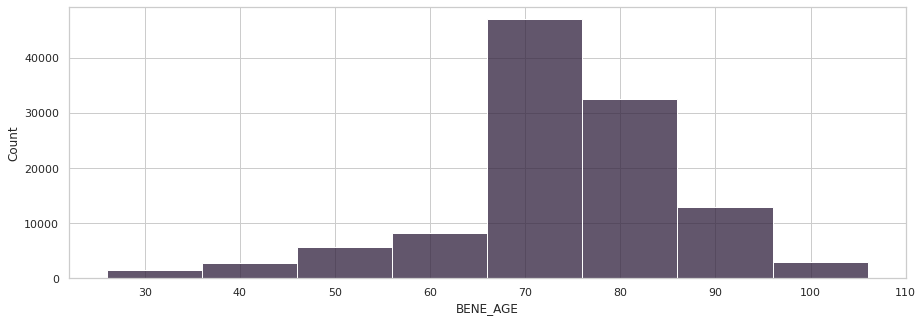

In [15]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="mako")
sb.histplot(x=round(demographics["BENE_AGE"]), binwidth=10)
plt.show()

In [16]:
demographics["BENE_AGE"].describe()

count    113692.000000
mean         73.136374
std          12.539417
min          25.500000
25%          68.000000
50%          74.000000
75%          81.000000
max         101.000000
Name: BENE_AGE, dtype: float64

## Age Groups

The Center for Medicare and Medicaid Services (CMS) defines five age categories in its' statistical analyses: 0-18, 19-44, 45-64, 65-84 and 85+.  Because the distribution of this data centers heavily on individuals between the ages of 65 and 85, I chose to separate the 65-84 group into two groups: 65-74 and 75-84.

38% of the beneficiaries in the sample are 65-74 years old

30% are 75-84 years old

and 17% are 85 or older

The remaining 13% are under 65 and there are no beneficiaries under 18.

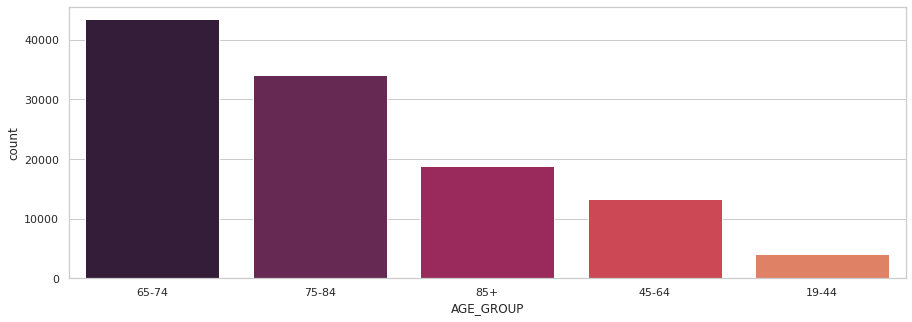

In [17]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="rocket")
sb.countplot(x=demographics["AGE_GROUP"])
plt.show()

In [18]:
demographics["AGE_GROUP"].value_counts(normalize=True)

65-74    0.381768
75-84    0.299291
85+      0.166151
45-64    0.117423
19-44    0.035367
Name: AGE_GROUP, dtype: float64

## Race & Ethnicity

For this data set, the beneficiary population is approximately 83% white, 11% Black or African American, 2% Hispanic, and 4% Other.  

Asians / Pacific Islanders and American Indians / AK Natives are not represented.

This unfortunately illustrates the disparity between the demographic make up of Medicare users and the general population.  While only about 65-68% of the general population is "white", about 80% of the Medicare population is.  This owes to a variety of social and cultural disparities in the United States including but not limited to "white" people living longer than people of color, generally having better living conditions, generally having higher socio-economic status and utilizing benefits / governmental systems at higher rates.

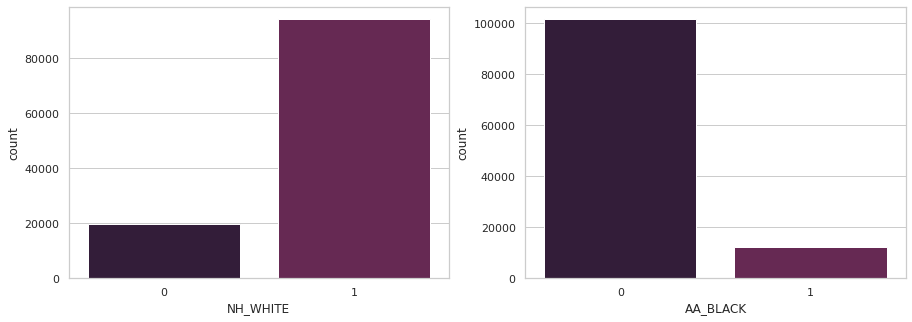

In [19]:
sb.set_theme(style="whitegrid", palette="rocket")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sb.countplot(x=demographics["NH_WHITE"], ax=axes[0])
sb.countplot(x=demographics["AA_BLACK"], ax=axes[1])
plt.show()

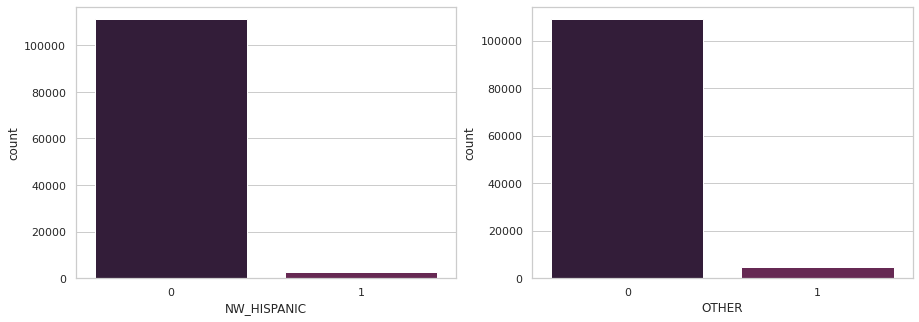

In [20]:
sb.set_theme(style="whitegrid", palette="rocket")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sb.countplot(x=demographics["NW_HISPANIC"], ax=axes[0])
sb.countplot(x=demographics["OTHER"], ax=axes[1])
plt.show()

In [21]:
demographics["NH_WHITE"].value_counts(normalize=True)

1    0.826786
0    0.173214
Name: NH_WHITE, dtype: float64

In [22]:
demographics["AA_BLACK"].value_counts(normalize=True)

0    0.892218
1    0.107782
Name: AA_BLACK, dtype: float64

In [23]:
demographics["NW_HISPANIC"].value_counts(normalize=True)

0    0.976779
1    0.023221
Name: NW_HISPANIC, dtype: float64

In [24]:
demographics["OTHER"].value_counts(normalize=True)

0    0.957789
1    0.042211
Name: OTHER, dtype: float64

Of the people who did not identify as white (17.3% of beneficiaries), 

62.2% self-identified as Black

13.4% self-identified as non-white Hispanic

and 24.4% self-identified as "Another Race"

Recall: Asian / Pacific Islanders, and American Indian / AK Natives were not represented.

In [25]:
people_of_color = demographics[demographics["NH_WHITE"]==0]

people_of_color["AA_BLACK"].value_counts(normalize=True)

1    0.622252
0    0.377748
Name: AA_BLACK, dtype: float64

In [26]:
people_of_color["NW_HISPANIC"].value_counts(normalize=True)

0    0.865942
1    0.134058
Name: NW_HISPANIC, dtype: float64

In [27]:
people_of_color["OTHER"].value_counts(normalize=True)

0    0.756309
1    0.243691
Name: OTHER, dtype: float64

## Sex

1 MALE, 2 FEMALE recoded to 1 MALE, 0 FEMALE

There are about 10% more females than males.  This is likely explained by women's increased likelihood of living to an older age.

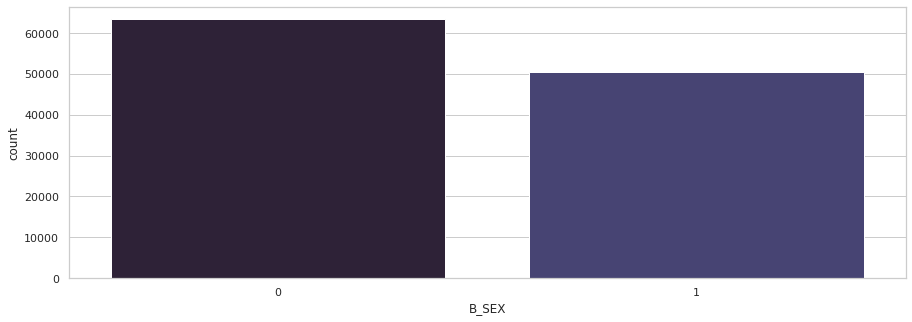

In [28]:
sb.set_theme(style="whitegrid", palette="mako")
sb.countplot(x=demographics["B_SEX"])
plt.show()

In [29]:
demographics["B_SEX"].value_counts(normalize=True)

0    0.556548
1    0.443452
Name: B_SEX, dtype: float64

## Deaths in 2009

1.5% of beneficiaries died in 2009.

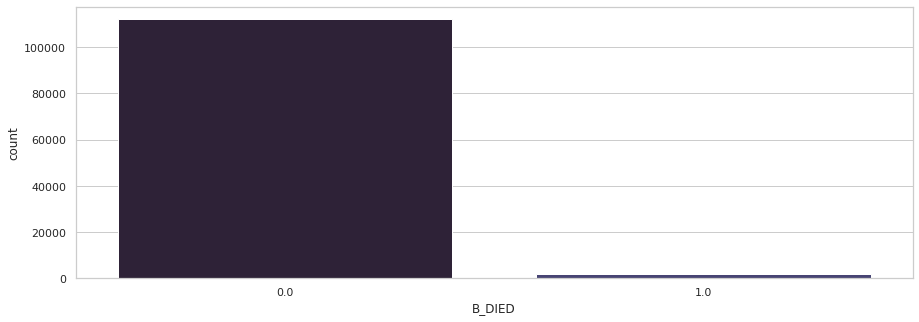

In [30]:
sb.set_theme(style="whitegrid", palette="mako")
sb.countplot(x=demographics["B_DIED"])
plt.show()

In [31]:
demographics["B_DIED"].value_counts(normalize=True)

0.0    0.98481
1.0    0.01519
Name: B_DIED, dtype: float64

## Chronic Conditions

Binary variables representing each of the CMS condition-groups. 

**0 = The patient does NOT have this condition,**

**1 = The patient DOES have this condition.**

Alzheimer's & Related B_ALZHDMTA 

Congestive Heart Failure B_CHF 

Cancer (Any type) B_CNCR

Depression B_DEPRESSN 

Diabetes Mellitus (Any type) B_DIABETES 

Ischemic Heart Disease B_ISCHMCHT 

Osteoporosis B_OSTEOPRS 

Chronic Obstructive Pulmonary Disease B_COPD 

Chronic Kidney Disease B_CHRNKIDN 

Rheumatoid or Osteoarthritis B_RA_OA 

Stroke or TIA B_STRKETIA 

End-Stage Renal Disease B_ESRD 

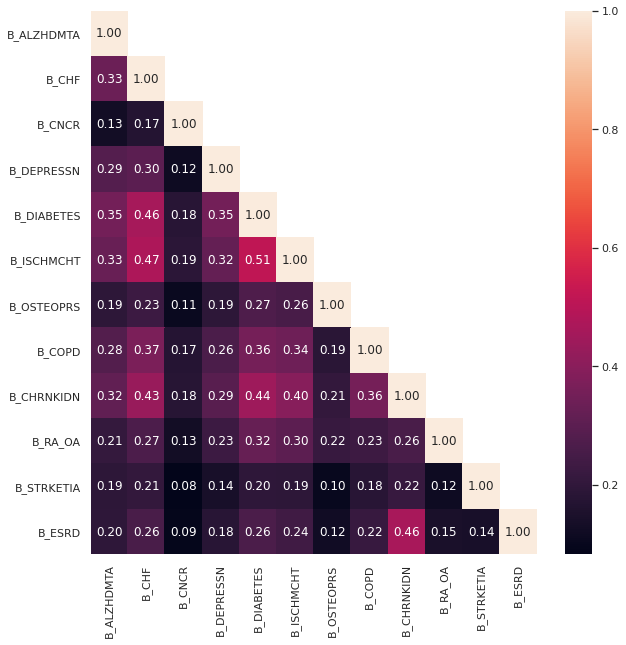

In [32]:
conditions = desynpuf[["B_ALZHDMTA", "B_CHF", "B_CNCR", "B_DEPRESSN", "B_DIABETES", "B_ISCHMCHT", 
                        "B_OSTEOPRS", "B_COPD", "B_CHRNKIDN", "B_RA_OA", "B_STRKETIA", "B_ESRD"]]
conditions_corr = conditions.corr(method="pearson")
lower_corr = conditions_corr.where(np.tril(np.ones(conditions_corr.shape)).astype(np.bool))

plt.rcParams["figure.figsize"] = (10.0, 10.0)
conditions_hmap=sb.heatmap(lower_corr, annot=True, cmap="rocket", fmt=".2f")
fig = conditions_hmap.get_figure()
fig.savefig("desynpuf_cc_heatmap.png")

Note the clinically understood correlations between diabetes, ischemic heart disease, CHF and CKD.

They are known to be causally connected on the basis of their pathophysiology.

Obviously, so are ESRD and CKD, which are two points on the same disease continuum.

There are also moderate correlations between depression, dementia, COPD and the DM/CHF/Heart Disease/CKD group.

Some of the relationship between "B_ALZHDMTA" and the DM/CHF/Heart Disease/CKD group could be due to the fact that CMS includes *all forms of dementia* in this group, including vascular dementia.

Strangly, there appears to be a weaker correlation between stroke / TIA and these diseases. Of note: CMS does not differentiate between ischemic, embolic and hemorrhagic causes of stroke.

While RA & OA produce similar disability in advanced stages, they have almost nothing in common in terms of pathophysiology or disease course.

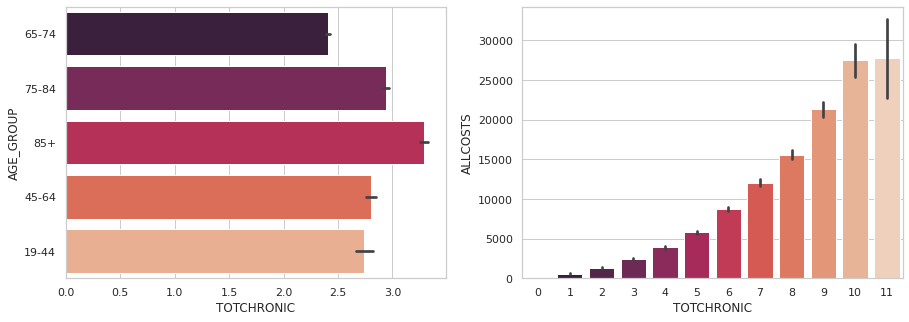

In [34]:
sb.set_theme(style="whitegrid", palette="rocket")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sb.barplot(x=desynpuf["TOTCHRONIC"], y=desynpuf["AGE_GROUP"], palette="rocket", ax=axes[0])
sb.barplot(x=desynpuf["TOTCHRONIC"], y=desynpuf["ALLCOSTS"], palette="rocket", ax=axes[1])
plt.show()

Most beneficiaries have more than 2.5 chronic conditions.  Those 65-74 have the least, while those under 65 have between 2 and 3 (likely due to their disability). 

Costs increase as the number of chronic conditions increases, but doesn't really start to take off until 5 or more chronic conditions.

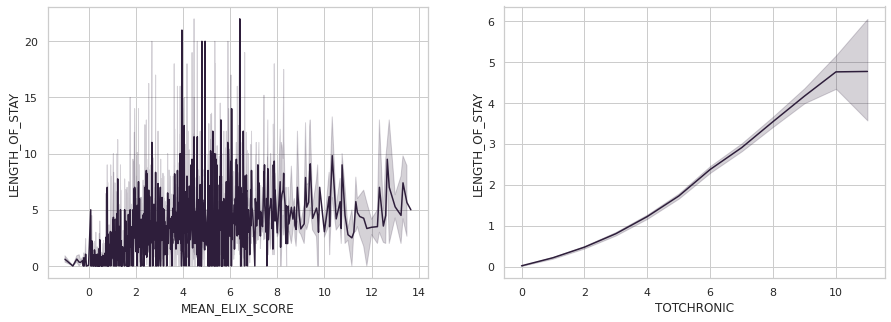

In [35]:
sb.set_theme(style="whitegrid", palette="mako")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sb.lineplot(x=desynpuf["MEAN_ELIX_SCORE"], y=desynpuf["LENGTH_OF_STAY"], ax=axes[0])
sb.lineplot(x=desynpuf["TOTCHRONIC"], y=desynpuf["LENGTH_OF_STAY"], ax=axes[1])
plt.show()

## Exploring the relationship between illness and visits, lengths of stay

Very few people have a Mean Elixhauser Score greater than 10.

During outlier removal, we eliminated a few beneficiaries with mean scores > 13.

Total visits peaks between scores of 4 and 7, and total length of stay is normally distributed around 5.

In [36]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113692 entries, 0000438E79D01BEA to FFFFF4859B6D7402
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BENE_AGE         113692 non-null  float64
 1   B_SEX            113692 non-null  int64  
 2   NH_WHITE         113692 non-null  int64  
 3   AA_BLACK         113692 non-null  int64  
 4   OTHER            113692 non-null  int64  
 5   NW_HISPANIC      113692 non-null  int64  
 6   B_DIED           113692 non-null  float64
 7   NUMBER_OF_STAYS  113692 non-null  int64  
 8   MEAN_COST        113692 non-null  float64
 9   SUM_COST         113692 non-null  float64
 10  AGE_GROUP        113692 non-null  object 
dtypes: float64(4), int64(6), object(1)
memory usage: 15.4+ MB


## Costs and visits, length of stay

Only 256 beneficiaries out of 113,692 (.2%) have more than 3 inpatient stays for the year (2009).

18,023 (16%) have more than zero stays.

4,377 (4%) have more than one stay.

1,100 (1%) have more than two stays.

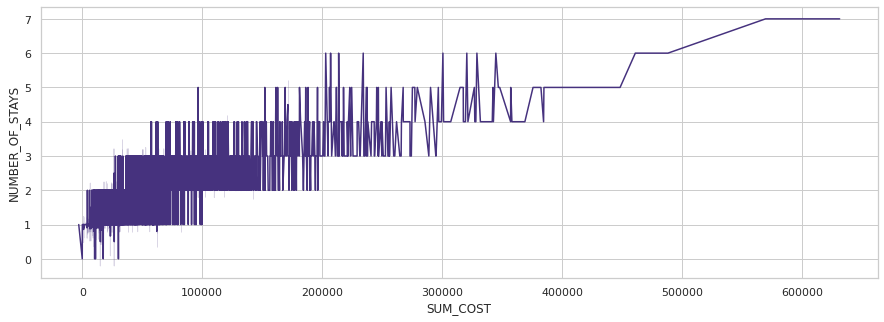

In [37]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="viridis")
sb.lineplot(x=demographics["SUM_COST"], y=demographics["NUMBER_OF_STAYS"], ci="sd")
plt.show()

## Cost of Visits by Length of Stay

Each data point is a visit.

Some beneficiaries have more than one visit (up to 7).

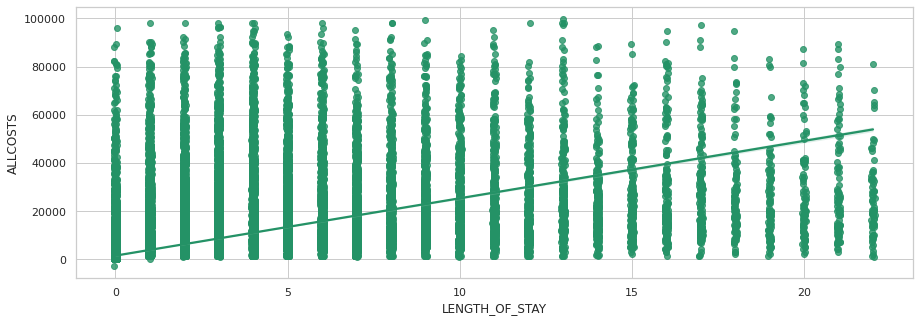

In [54]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="summer")
sb.regplot(y=desynpuf["ALLCOSTS"], x=desynpuf["LENGTH_OF_STAY"], x_jitter=.05)
plt.show()

## Histograms - Costs, Visits & Length of Stay

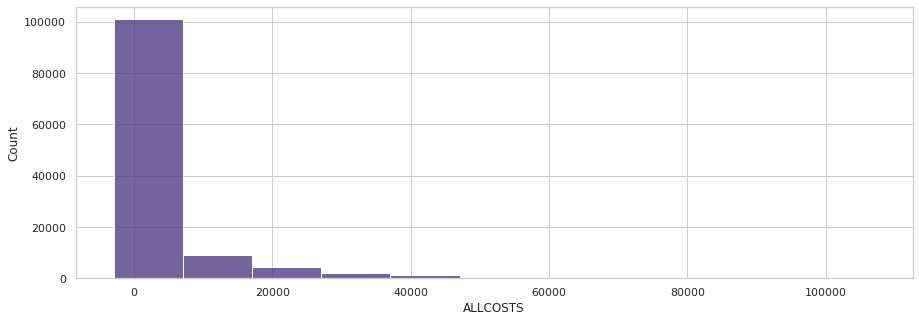

In [55]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="viridis")
sb.histplot(x=desynpuf["ALLCOSTS"], binwidth=10000)
plt.show()

In [56]:
desynpuf["ALLCOSTS"].describe()

count    119508.000000
mean       3707.196874
std       10380.105493
min       -2932.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       99848.000000
Name: ALLCOSTS, dtype: float64

### Costs > $0

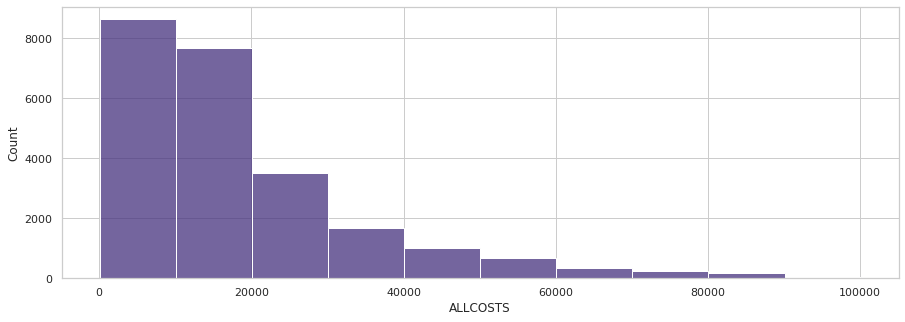

In [57]:
over_zero_costs = desynpuf[desynpuf["ALLCOSTS"]>0]

sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="viridis")
sb.histplot(x=over_zero_costs["ALLCOSTS"], binwidth=10000)
plt.show()

### Boxplot: Costs > $50,000 (per IP visit)


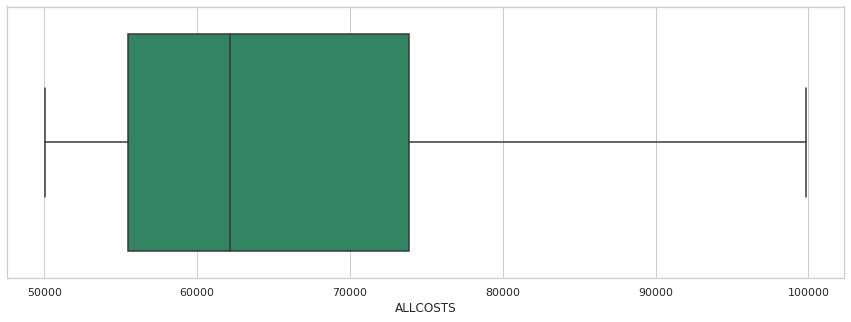

In [58]:
over_50_costs = desynpuf[desynpuf["ALLCOSTS"]>50000]

sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="summer")
sb.boxplot(x=over_50_costs["ALLCOSTS"])
plt.show()

### Number of Stays

Number of inpatient stays per beneficiary, 2009

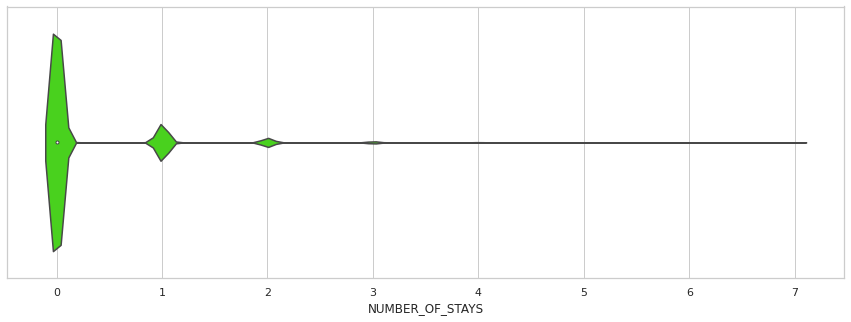

In [60]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="prism")
sb.violinplot(x=demographics["NUMBER_OF_STAYS"])
plt.show()

### Lengths of Stay

For IP stays costing >$50k


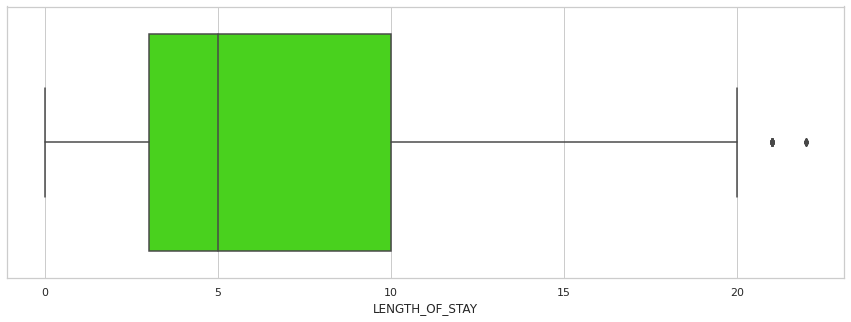

In [61]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="prism")
sb.boxplot(x=over_50_costs["LENGTH_OF_STAY"])
plt.show()

### Mean Length of Stay per hospitalization: 4 days

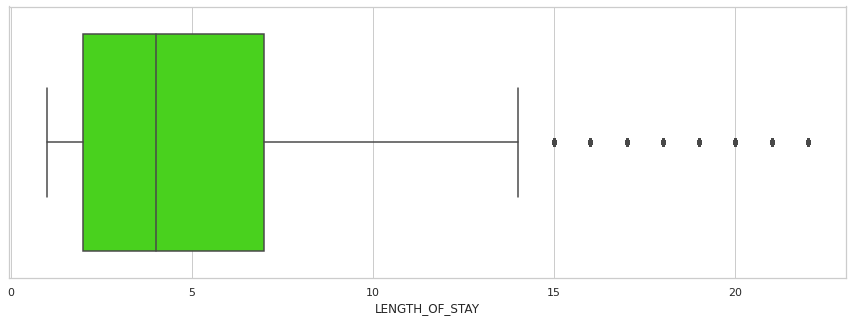

In [63]:
hosp = desynpuf[desynpuf["LENGTH_OF_STAY"]>0]

sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="prism")
sb.boxplot(x=hosp["LENGTH_OF_STAY"])
plt.show()

## Codes & Physicians

ICD9 Codes and Numbers of Physicians for Inpatient Claims, 2009

Average # of Codes per Admission: 9.5

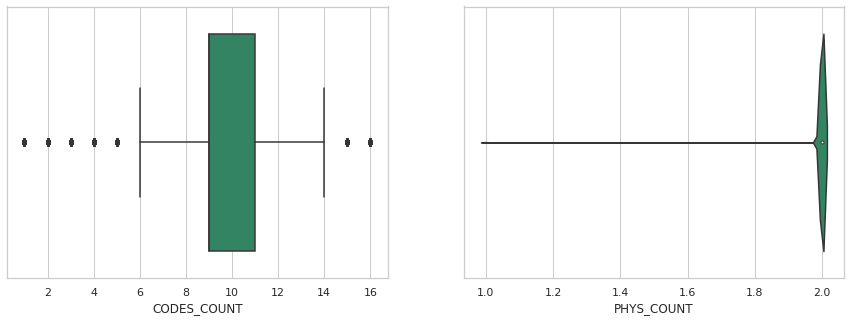

In [67]:
non_zero_codes = desynpuf[desynpuf["CODES_COUNT"]>0]

sb.set_theme(style="whitegrid", palette="summer")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sb.boxplot(x=non_zero_codes["CODES_COUNT"], ax=axes[0])
sb.violinplot(x=non_zero_codes["PHYS_COUNT"], ax=axes[1])
plt.show()

In [68]:
non_zero_codes["CODES_COUNT"].describe()

count    23839.000000
mean         9.489828
std          2.626059
min          1.000000
25%          9.000000
50%          9.000000
75%         11.000000
max         16.000000
Name: CODES_COUNT, dtype: float64

## 2009 Prevalence

In 2009 (after outlier removal), **at discrete inpatient visits**, 

31% of the beneficiaries had none of the noted chronic conditions.

11% had 1, 

11% had 2, 

10.5% had 3, 

10% had 4, 

8.7% had 5, 

7.2% had 6,

5.6% had 7,

3.5% had 8,

and the remaining 2% had 9 or more.

**Some beneficiaries changed the number of chronic conditions they had during the year.**

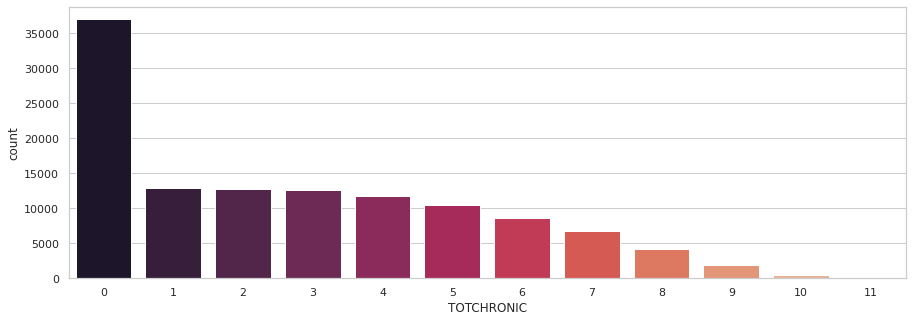

In [72]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid")
sb.countplot(x=desynpuf["TOTCHRONIC"], palette="rocket")
plt.show()

In [73]:
desynpuf["TOTCHRONIC"].value_counts(normalize=True)

0     0.309394
1     0.107825
2     0.106779
3     0.105139
4     0.098688
5     0.087107
6     0.071937
7     0.056373
8     0.035546
9     0.016359
10    0.004385
11    0.000469
Name: TOTCHRONIC, dtype: float64

In [76]:
cclt5 = desynpuf[(desynpuf["TOTCHRONIC"]<5) & (desynpuf["LENGTH_OF_STAY"]>0)]
cclt5["LENGTH_OF_STAY"].describe()

count    7323.000000
mean        4.632528
std         3.818258
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        22.000000
Name: LENGTH_OF_STAY, dtype: float64

In [77]:
cclt9 = desynpuf[(desynpuf["TOTCHRONIC"]<9) & (desynpuf["TOTCHRONIC"]>4) & (desynpuf["LENGTH_OF_STAY"]>0)]
cclt9["LENGTH_OF_STAY"].describe()

count    13794.000000
mean         5.288821
std          4.163529
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         22.000000
Name: LENGTH_OF_STAY, dtype: float64

In [78]:
ccgt9 = desynpuf[(desynpuf["TOTCHRONIC"]>9) & (desynpuf["LENGTH_OF_STAY"]>0)]
ccgt9["LENGTH_OF_STAY"].describe()

count    470.000000
mean       5.872340
std        4.698668
min        1.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       22.000000
Name: LENGTH_OF_STAY, dtype: float64

Mean length of stay for those with 4 or fewer chronic conditions (and LOS>0) is 4.6 days. Median LOS is 3 days.

5-8 conditions increases it to 5.3 days, median to 4 days.

9 or more conditions, mean LOS is 5.9 days, and median is 4 days.

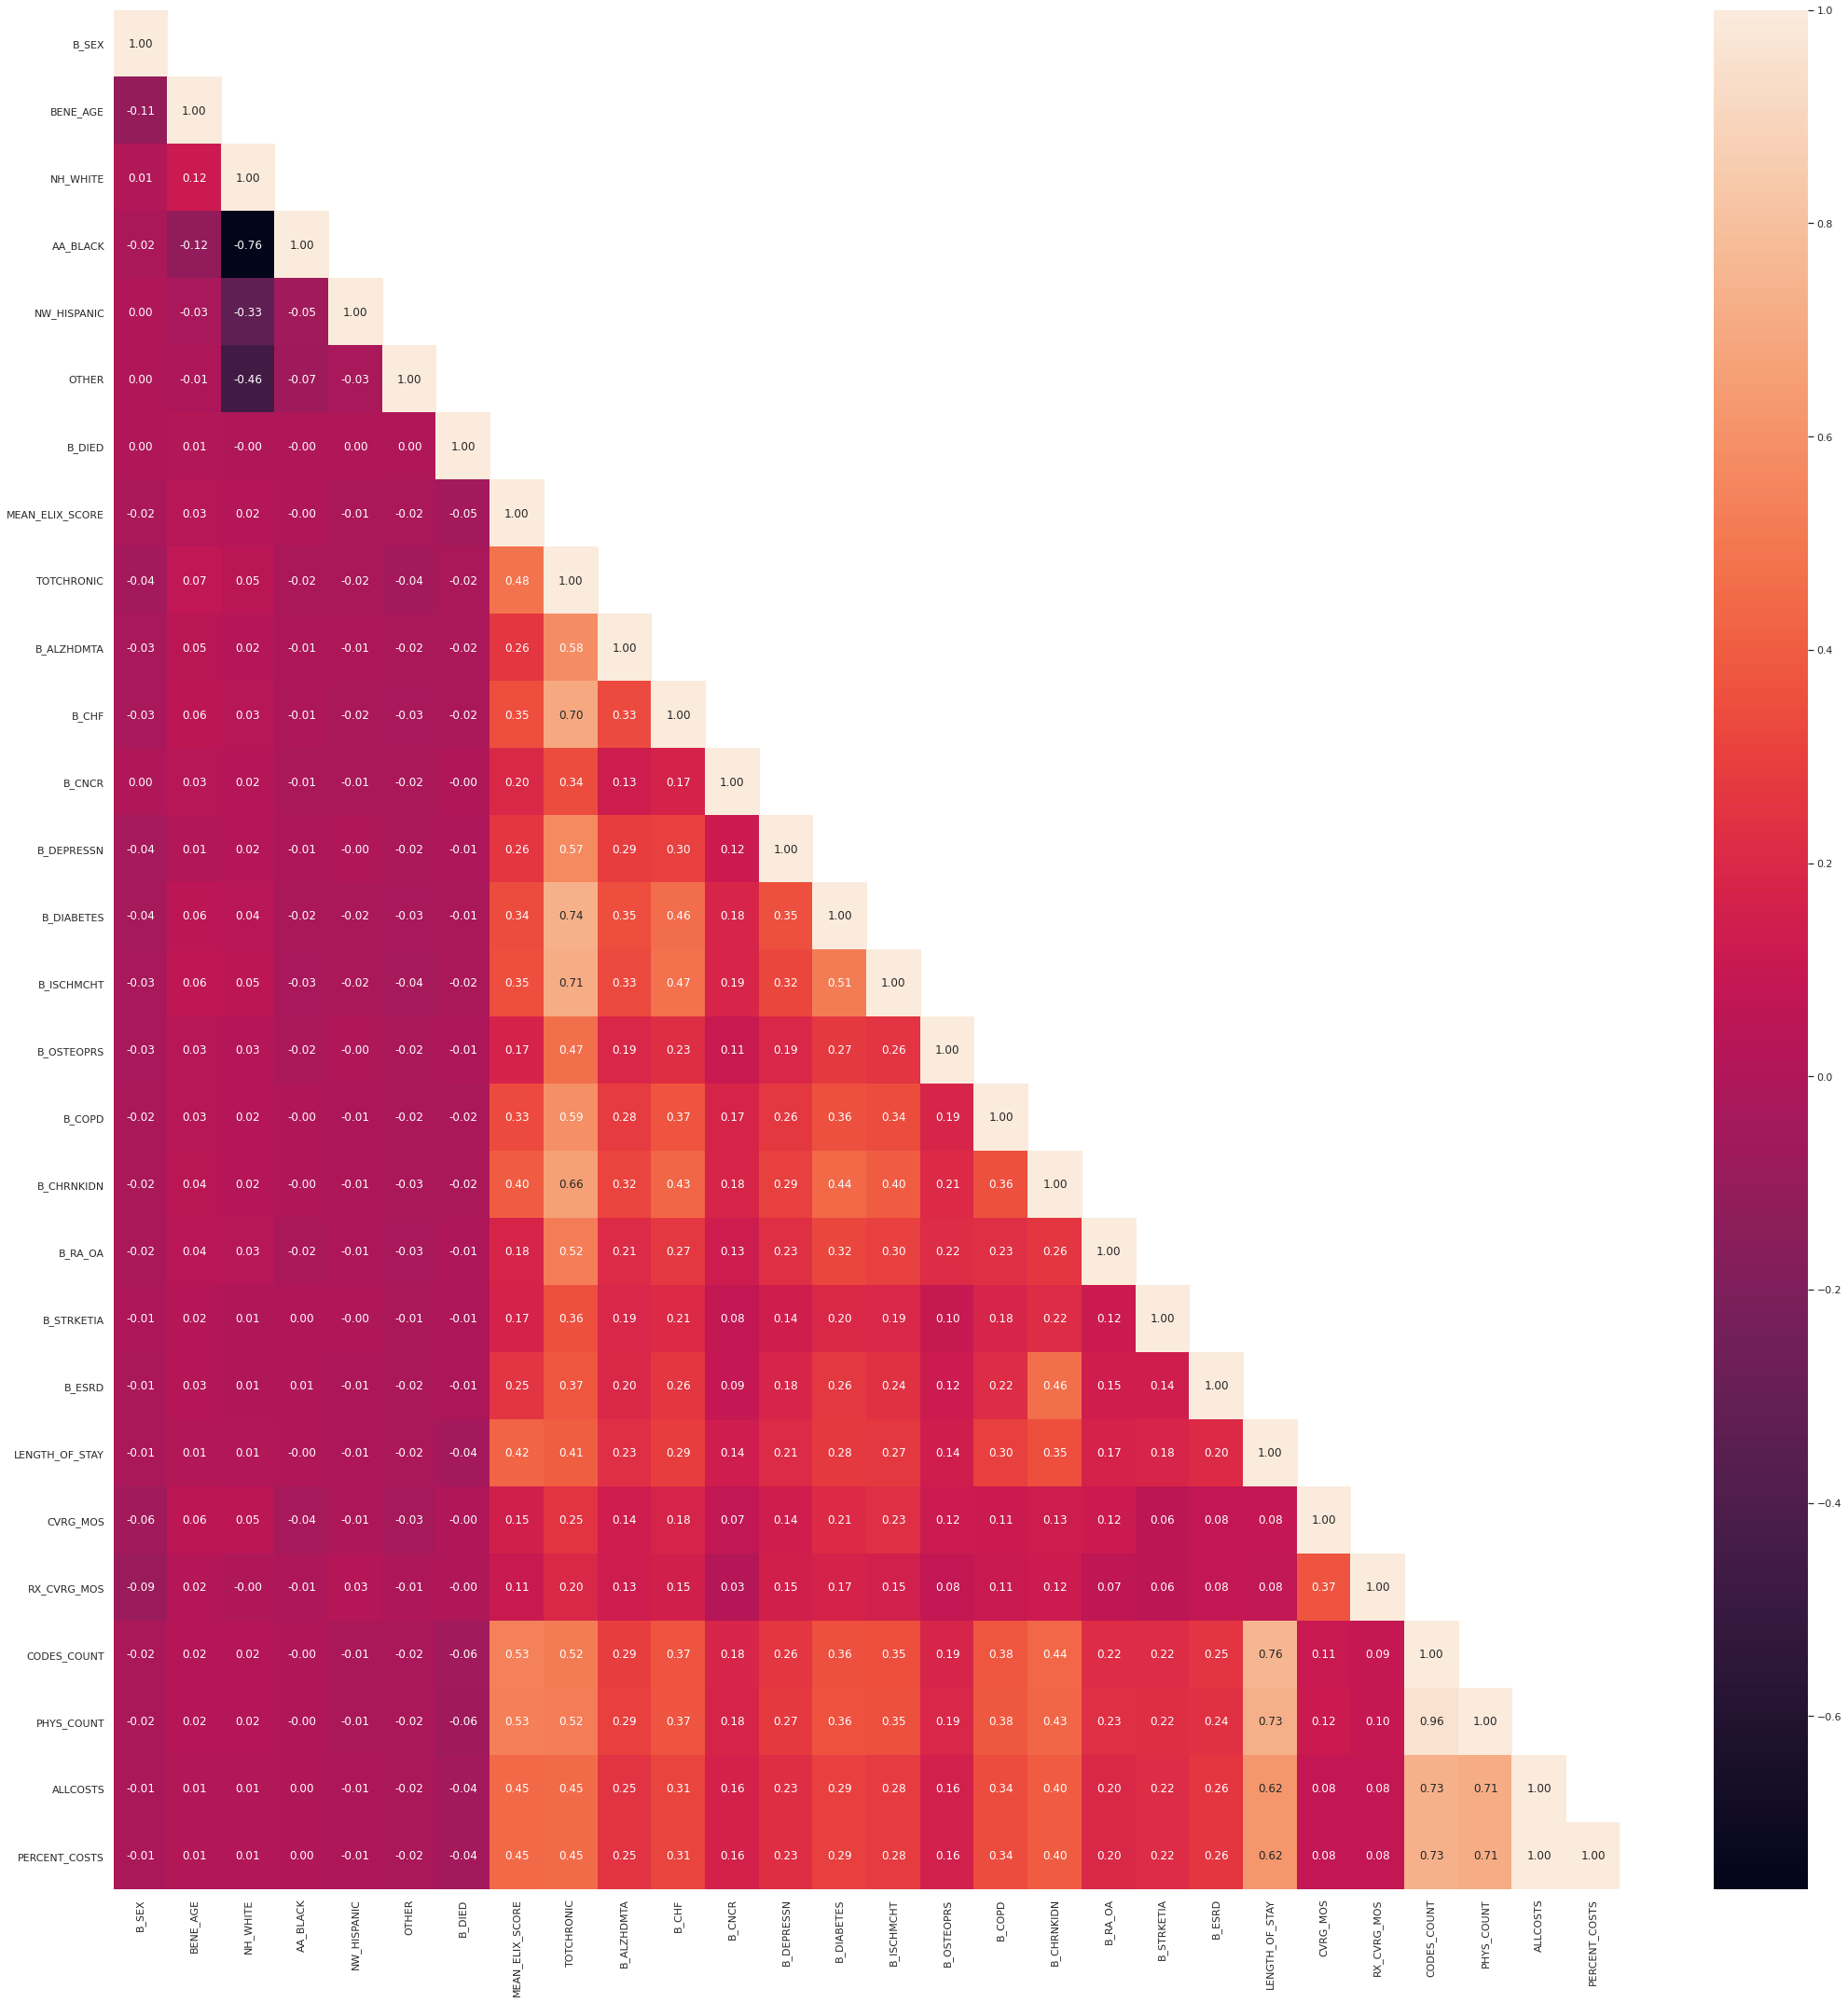

In [81]:
visits_data = desynpuf[["B_SEX", "BENE_AGE", "NH_WHITE", "AA_BLACK", "NW_HISPANIC", "OTHER", "B_DIED", 
                    "MEAN_ELIX_SCORE", "TOTCHRONIC", "B_ALZHDMTA", "B_CHF", "B_CNCR", "B_DEPRESSN", 
                    "B_DIABETES", "B_ISCHMCHT", "B_OSTEOPRS", "B_COPD", "B_CHRNKIDN", "B_RA_OA", 
                    "B_STRKETIA", "B_ESRD", "LENGTH_OF_STAY", "CVRG_MOS", "RX_CVRG_MOS", 
                    "CODES_COUNT", "PHYS_COUNT", "ALLCOSTS", "PERCENT_COSTS"]]

subset_corr = visits_data.corr(method="pearson")
lower_corr = subset_corr.where(np.tril(np.ones(subset_corr.shape)).astype(np.bool))

plt.rcParams["figure.figsize"] = (30.0, 30.0)
subset_hmap=sb.heatmap(lower_corr, annot=True, cmap="rocket", fmt=".2f")
fig = subset_hmap.get_figure()
fig.tight_layout()
fig.savefig("visits_data_heatmap.png")